# Documentations

[OpenCV Image Processing](https://docs.opencv.org/4.5.4/d7/dbd/group__imgproc.html)

[Matplotlib Pyplot](https://matplotlib.org/stable/api/pyplot_summary.html#module-matplotlib.pyplot)

[Pandas API](https://pandas.pydata.org/docs/reference/index.html#api)

[Numpy API](https://numpy.org/devdocs/reference/index.html#reference)

# Notes

## Imports

In [ ]:
import pandas as pd
import numpy as np

from glob import glob

import cv2
import matplotlib.pyplot as plt


## Image Reading


get and load image directory

In [ ]:
# Option 1: Upload to session storage the mirflickr10.zip file first before running
# import zipfile
# with zipfile.ZipFile('/content/mirflickr10.zip','r') as zip_ref:
#   zip_ref.extractall('/content/')
# im_files = glob('/content/mirflickr10/*.jpg')

# Option 2: Mount GDrive
im_files = glob('/content/drive/MyDrive/THS2/mirflickr10/*.jpg')

read an image file with matplotlib or cv2

In [ ]:
im_plt = plt.imread(im_files[2])
im_cv2 = cv2.imread(im_files[2])
im_plt.shape, im_cv2.shape

((316, 500, 3), (316, 500, 3))

Display an image's pixel color values in a plot from 0 to 255

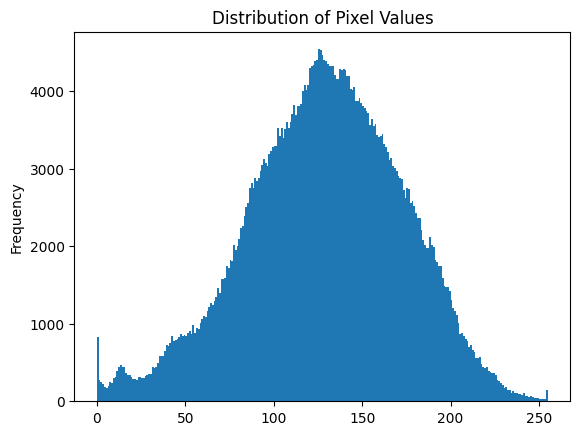

In [ ]:
pd.Series(im_plt.flatten()).plot(kind='hist', bins=255, title='Distribution of Pixel Values')

plt.show()

## Image Display

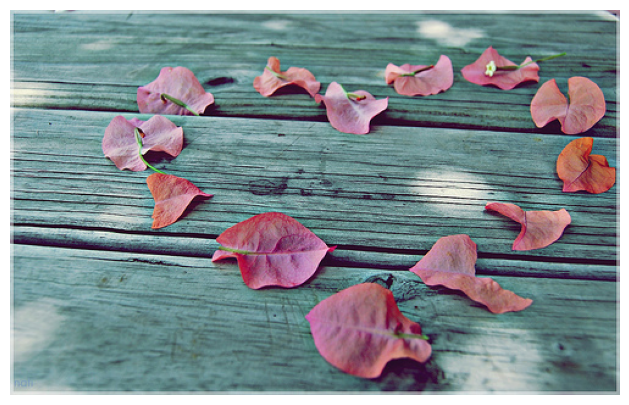

In [ ]:
# Display the image content of im_plt

fig, ax = plt.subplots(figsize=(10, 5))     # make subplot
ax.axis('off')                              # hide the x, y axis
ax.imshow(im_plt)                           # place im_plt into the plot

plt.show()

In [ ]:
im_plt.shape

(316, 500, 3)

From the `im_plt.shape` from above, it displayed 3 values with being the x, and y dimensions, and the RGB color channel (Red, Green, & Blue).

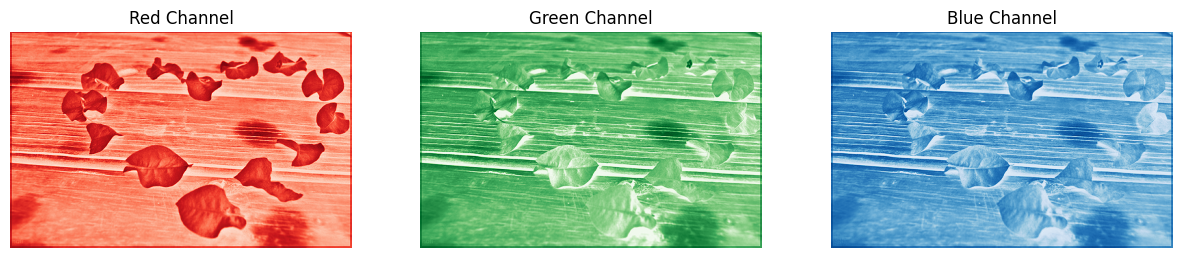

In [ ]:
# Display RGB Channels
# using 3 subplots, 1 for each color

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(im_plt[:,:,0], cmap='Reds')
axs[1].imshow(im_plt[:,:,1], cmap='Greens')
axs[2].imshow(im_plt[:,:,2], cmap='Blues')

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')

axs[0].set_title('Red Channel')
axs[1].set_title('Green Channel')
axs[2].set_title('Blue Channel')

plt.show()

## Matplotlib vs CV2

- Matplotlib reads in RGB
- CV2 reads in BGR

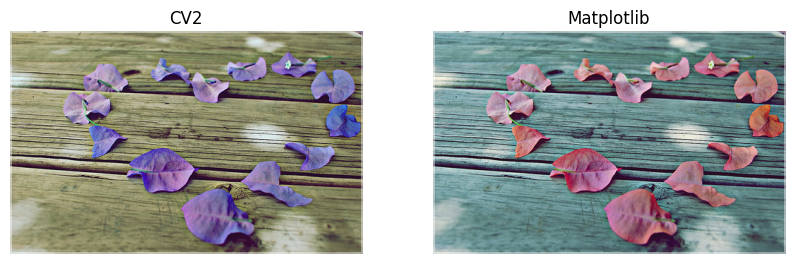

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(im_cv2)
axs[1].imshow(im_plt)
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('CV2')
axs[1].set_title('Matplotlib')
plt.show()

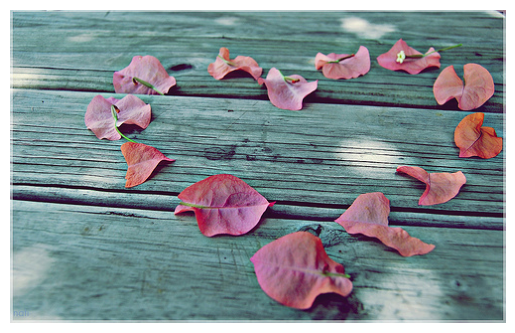

In [ ]:
# BGR to RGB Conversion
im_cv2_rgb = cv2.cvtColor(im_cv2, cv2.COLOR_BGR2RGB)
fig, ax = plt.subplots()
ax.imshow(im_cv2_rgb)
ax.axis('off')
plt.show()

## Image Manipulation

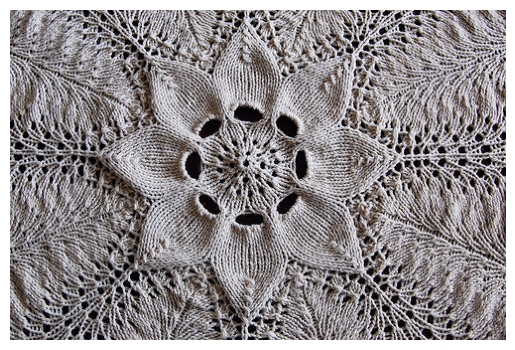

In [ ]:
 # Load and show image

im = plt.imread(im_files[1])
fig, ax = plt.subplots()
ax.imshow(im)
ax.axis('off')
plt.show()

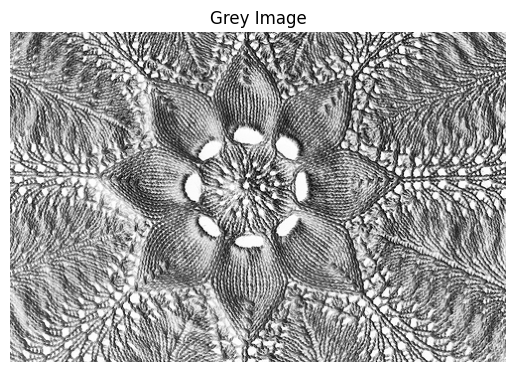

In [ ]:
im_gray = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
fig, ax = plt.subplots()
ax.imshow(im_gray, cmap='Greys')
ax.axis('off')
ax.set_title('Grey Image')
plt.show()

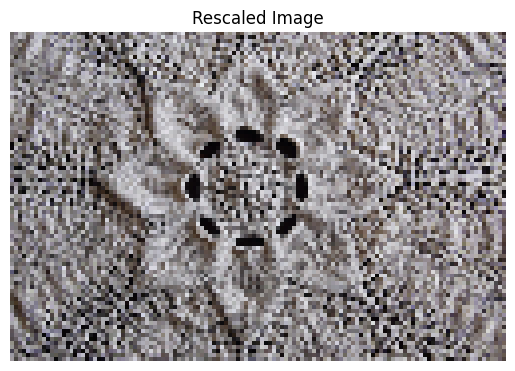

In [ ]:
# Resizing and Rescaling

im_resized = cv2.resize(im, None, fx=0.25, fy=0.25) # Multiplied x and y dimensions of original to 0.25
fig, ax = plt.subplots()
ax.imshow(im_resized)
ax.axis('off')
ax.set_title('Rescaled Image')
plt.show()

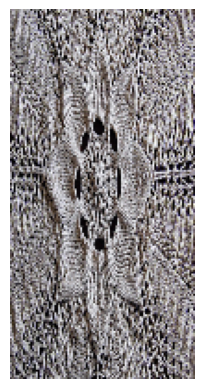

In [ ]:
# Another method

im_resize = cv2.resize(im, (100, 200))  # Defined the exact dimensions to 100x200
fig, ax = plt.subplots()
ax.imshow(im_resize)
ax.axis('off')
plt.show()

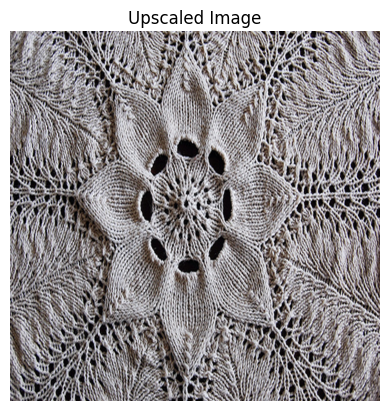

In [ ]:
# Upscaling

im_resize = cv2.resize(im, (5000, 5000), interpolation = cv2.INTER_CUBIC) # Largen image dimensions to 5000x5000 w/ interpolation, refer to cv2 documentation for different ways
fig, ax = plt.subplots()
ax.imshow(im_resize)
ax.axis('off')
ax.set_title('Upscaled Image')
plt.show()

In [ ]:
im_resize.shape, im.shape

((5000, 5000, 3), (333, 500, 3))

## CV2 Kernels
<img src="https://editor.analyticsvidhya.com/uploads/81269Capture.PNG" alt="imgpixels" style="width:400px;" />

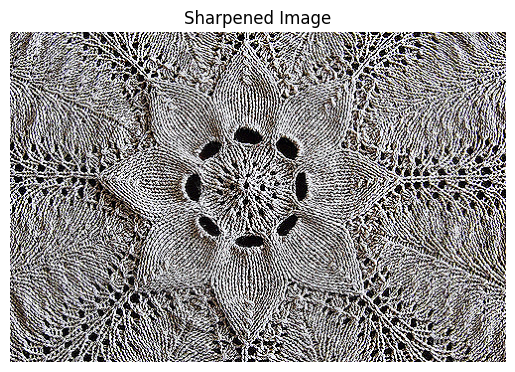

In [ ]:
# Sharpening

kernel_sharpening = np.array([[-0, -1, -0],
                              [-1, 5, -1],
                              [-0, -1, -0]])

sharpened = cv2.filter2D(im, -1, kernel_sharpening)

fig, ax = plt.subplots()
ax.imshow(sharpened)
ax.axis('off')
ax.set_title('Sharpened Image')
plt.show()

In [ ]:
# Blurring

kernel_3x3 = np.ones((3, 3), np.float32) / 9  # The last value can be changed as how you see fit
kernel_3x3                                    # This is what the kernel looks like (1/9 is 0.11...)

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]], dtype=float32)

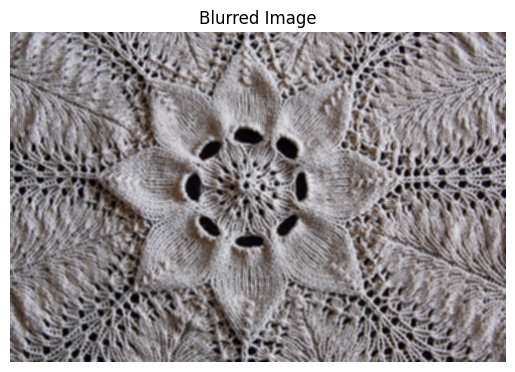

In [ ]:
blurred = cv2.filter2D(im, -1, kernel_3x3)
fig, ax = plt.subplots()
ax.imshow(blurred)
ax.axis('off')
ax.set_title('Blurred Image')
plt.show()

## Save Image

In [ ]:
# 2 Ways

plt.imsave('plt_im_blurred.png', blurred) # via matplotlib

cv2.imwrite('cv2_im_sharpened.png', sharpened) # via cv2

True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Preprocessing Pipeline Prototype

## Imports

In [ ]:
!pip install bchlib==0.12.0

  Preparing metadata (setup.py) ... done
  Created wheel for bchlib: filename=bchlib-0.12.0-cp310-cp310-linux_x86_64.whl size=63769 sha256=15ad49fc89a2c7285b8fc4f49f3babe15ea767d400277d2274751e2dcf739920
  Stored in directory: /root/.cache/pip/wheels/e7/c3/fb/2f195751a935b92928d4b4b6a1d06e04365ff585c3a1bdbf9a
Successfully built bchlib


In [ ]:
# From encode_image.py
import bchlib
from glob import glob
import os
from PIL import Image, ImageOps
import numpy as np
import tensorflow as tf
from tensorflow.python.saved_model import tag_constants, signature_constants

# additionals
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from natsort import natsorted

In [ ]:
# Import and unpack mirflickr dataset
import zipfile
with zipfile.ZipFile('/content/drive/Shareddrives/[CV7] Watermarking/CV7 - Watermarking/Dataset/preprocessed-mirflick25k.zip','r') as zip_ref:
  zip_ref.extractall('/content/')

In [ ]:
im_files = natsorted(glob('/content/preprocessed-mirflick25k/*.jpg'))

# preview
im_files[:15]

['/content/preprocessed-mirflick25k/im1.jpg',
 '/content/preprocessed-mirflick25k/im2.jpg',
 '/content/preprocessed-mirflick25k/im3.jpg',
 '/content/preprocessed-mirflick25k/im4.jpg',
 '/content/preprocessed-mirflick25k/im5.jpg',
 '/content/preprocessed-mirflick25k/im6.jpg',
 '/content/preprocessed-mirflick25k/im7.jpg',
 '/content/preprocessed-mirflick25k/im8.jpg',
 '/content/preprocessed-mirflick25k/im9.jpg',
 '/content/preprocessed-mirflick25k/im10.jpg',
 '/content/preprocessed-mirflick25k/im11.jpg',
 '/content/preprocessed-mirflick25k/im12.jpg',
 '/content/preprocessed-mirflick25k/im13.jpg',
 '/content/preprocessed-mirflick25k/im14.jpg',
 '/content/preprocessed-mirflick25k/im15.jpg']

In [ ]:
for filename in im_files[1250:1255]:
  print(filename)

/content/preprocessed-mirflick25k/im1251.jpg
/content/preprocessed-mirflick25k/im1252.jpg
/content/preprocessed-mirflick25k/im1253.jpg
/content/preprocessed-mirflick25k/im1254.jpg
/content/preprocessed-mirflick25k/im1255.jpg


## Read, Display, & Perturb Image

"Data augmentation will be applied to the MIRFLICKR dataset in hopes of
making the model more robust to various forms of real-world image perturbations
as introduced by: (i) the image on the real-world, (ii) the camera handler, and (iii)
the camera itself. The transformations are, in order: **perspective warp**, **motion blur**, **color manipulation**, **noise**, and **JPEG compression**."

- `im_files[:1250]` will be subject to perspective warp
- `im_files[1251:2500]` for motion blur
- `im_files[2501:3750]` for color shifts
- `im_files[3751:5000]` for noise
- `im_files[5001:6250]` for JPEG Compression

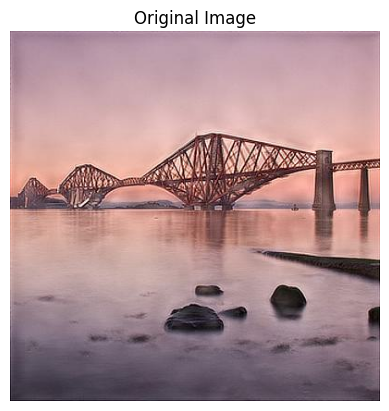

In [ ]:
im = plt.imread(im_files[6249])

fig, ax = plt.subplots()
ax.axis('off')
ax.set_title('Original Image')
ax.imshow(im)

plt.show()

### Rotate

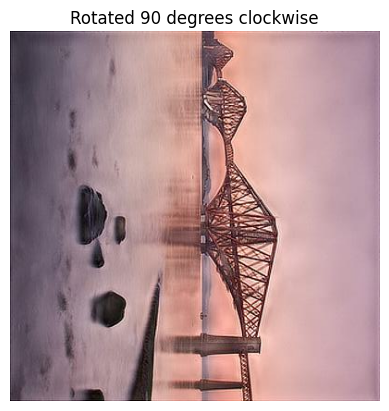

In [ ]:
# Image Rotation
im_rotated_90 = cv2.rotate(im, cv2.ROTATE_90_CLOCKWISE)

fig, ax = plt.subplots()
ax.axis('off')
ax.set_title('Rotated 90 degrees clockwise')
ax.imshow(im_rotated_90)

plt.show()

### Perspective Warp

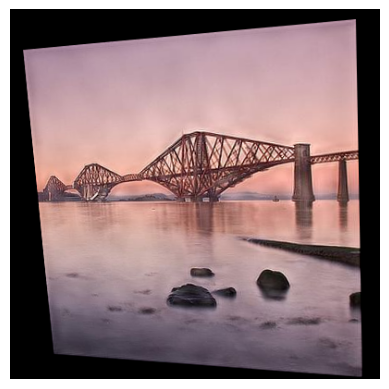

In [ ]:
# Perspective Warp
def perspective_warp(im):
  # Randomize destination ranges
  #Top-Left
  x1 = np.random.randint(0, 51)
  y1 = np.random.randint(0, 51)
  #Top-Right
  x2 = np.random.randint(350, 401)
  y2 = np.random.randint(0, 51)
  #Bottom-Right
  x3 = np.random.randint(350, 401)
  y3 = np.random.randint(350, 401)
  #Bottom-Left
  x4 = np.random.randint(0, 51)
  y4 = np.random.randint(350, 401)

  # Perspective Warp
  src = np.float32([[0,0], [400,0], [400,400], [0,400]])              # top-left, top-right, bottom-right, bottom-left
  dst = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
  M = cv2.getPerspectiveTransform(src, dst)                           # Transformation Matrix
  im_warped = cv2.warpPerspective(im, M, (400,400))

  fig, ax = plt.subplots()
  ax.axis('off')
  ax.imshow(im_warped)

  plt.show()

perspective_warp(im)

### Motion Blur

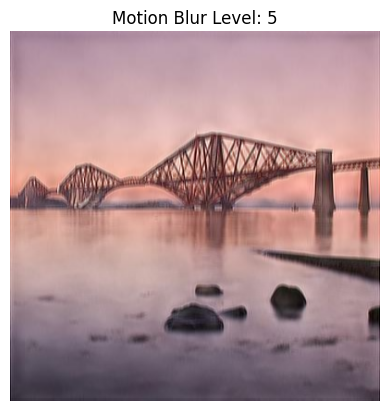

In [ ]:
# Motion Blur
def motion_blur(im):
  k_size = np.random.randint(3,6)                           # Randomize Motion Blur Intensities
  kernel_motblur = np.zeros((k_size,k_size))
  #kernel_motblur[int((k_size - 1)/2), :] = np.ones(k_size)  # Horizontal
  kernel_motblur[:, int((k_size - 1)/2)] = np.ones(k_size)  # Vertical
  kernel_motblur /= k_size
  kernel_motblur

  im_motblur = cv2.filter2D(im, -1, kernel_motblur)

  fig, ax = plt.subplots()
  ax.axis('off')
  ax.set_title(f'Motion Blur Level: {k_size}')
  ax.imshow(im_motblur)

  plt.show()

motion_blur(im)

### Color Shift

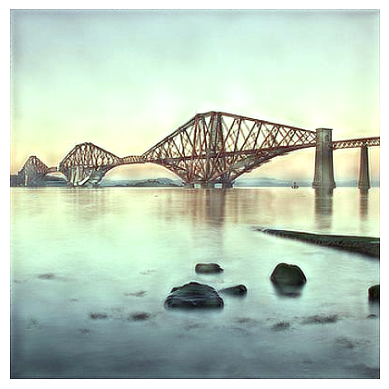

In [ ]:
# Color Shift via Gray-World White Balancing
def white_balance(im):

  avg = np.mean(im)

  # Randomize wb scaling
  r = np.random.uniform(1.0, 1.5)
  g = np.random.uniform(1.0, 1.5)
  b = np.random.uniform(1.0, 1.5)
  scale = np.array([r, g, b])

  im_wb = im * scale
  im_wb = np.clip(im_wb, 0, 255).astype(np.uint8)

  fig, ax = plt.subplots()
  ax.axis('off')
  ax.imshow(im_wb)

white_balance(im)

### Noise

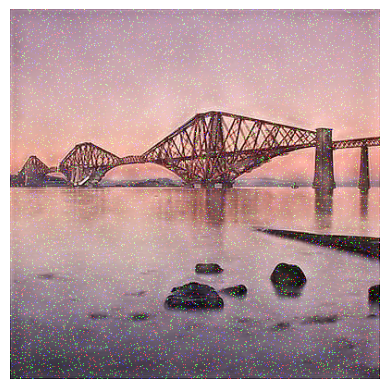

In [ ]:
# Noise via Gaussian method
def gaussian_noise(im):

  mean = 0
  std = np.random.uniform(0.5, 1.0)

  noise = np.random.normal(mean, std, im.shape).astype(np.uint8)
  im_noise = cv2.add(im, noise)

  fig, ax = plt.subplots()
  ax.axis('off')
  ax.imshow(im_noise)

gaussian_noise(im)

### JPEG Compression

In [ ]:
# JPEG Compression
cv2.imwrite('compressed.jpg', im, [int(cv2.IMWRITE_JPEG_QUALITY), np.random.randint(50,101)])

True

In [ ]:
# Save image
save_name = im_files[6249].split('/')[-1].split('.')[0].split('im')[-1]
plt.imsave('im' + f'{int(save_name)+ 25000}.jpg', im)

## Encode Image Function

StegaStamp's `encode.py` converted to a function

In [ ]:
BCH_POLYNOMIAL = 137
BCH_BITS = 5

# Attempt at Refactoring encode_image.py from Tensorflow 1.X to 2.X
def encode_image(model, image=None, images_dir=None, save_dir=None, secret='Stega!!'):
    if image is not None:
        files_list = [image]
    elif images_dir is not None:
        files_list = glob(images_dir + '/*')
    else:
        print('Missing input image')
        return

    model = tf.saved_model.load(model, tags=[tag_constants.SERVING])

    input_signature = model.signatures[signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY]
    # print(input_signature.inputs[0].name)
    input_secret_name = input_signature.inputs[0].name

    # print(input_signature.inputs[1])
    # input_image_name = input_signature.input_names[1]
    input_image_name = input_signature.inputs[1].name

    # print(dir(model))
    print(input_signature.inputs)
    # input_secret = model.inputs[input_secret_name]  # <--------- fixing these na, model.inputs doesnt exist
    # input_image = model.inputs[input_image_name]    # <--------- fixing these na

    # output_stegastamp_name = input_signature.output_names[0]
    # output_residual_name = input_signature.output_names[1]
    # output_stegastamp = model.outputs[output_stegastamp_name]
    # output_residual = model.outputs[output_residual_name]

    # width = 400
    # height = 400

    # bch = bchlib.BCH(BCH_POLYNOMIAL, BCH_BITS)

    # if len(secret) > 7:
    #     print('Error: Can only encode 56 bits (7 characters) with ECC')
    #     return

    # data = bytearray(secret + ' ' * (7 - len(secret)), 'utf-8')
    # ecc = bch.encode(data)
    # packet = data + ecc

    # packet_binary = ''.join(format(x, '08b') for x in packet)
    # secret = [int(x) for x in packet_binary]
    # secret.extend([0, 0, 0, 0])

    # if save_dir is not None:
    #     if not os.path.exists(save_dir):
    #         os.makedirs(save_dir)
    #     size = (width, height)
    #     for filename in files_list:
    #         image_data = read_file(filename)
    #         image = tf.image.decode_image(image_data, channels=3)
    #         image = tf.image.convert_image_dtype(image, tf.float32)
    #         image = resize(image, [width, height])

    #         feed_dict = {input_secret: [secret],
    #                      input_image: [image]}

    #         hidden_img, residual = model.predict(feed_dict)

    #         rescaled = (hidden_img[0] * 255).astype(np.uint8)
    #         residual = (residual[0] + .5) * 255

    #         save_name = os.path.splitext(os.path.basename(filename))[0]

    #         im = Image.fromarray(np.array(rescaled))
    #         im.save(os.path.join(save_dir, f'{save_name}_hidden.png'))

    #         im = Image.fromarray(np.squeeze(np.array(residual, dtype=np.uint8)))
    #         im.save(os.path.join(save_dir, f'{save_name}_residual.png'))

encode_image('/content/drive/MyDrive/THS2/saved_models/stegastamp_pretrained', '/content/test_im.jpg', None, 'out/')

[<tf.Tensor 'input_hide:0' shape=(None, 400, 400, 3) dtype=float32>, <tf.Tensor 'input_prep:0' shape=(None, 100) dtype=float32>, <tf.Tensor 'gen_secret/dense/kernel:0' shape=() dtype=resource>, <tf.Tensor 'gen_secret/dense/bias:0' shape=() dtype=resource>, <tf.Tensor 'gen_encoder/enc_conv_1/kernel:0' shape=() dtype=resource>, <tf.Tensor 'gen_encoder/enc_conv_1/bias:0' shape=() dtype=resource>, <tf.Tensor 'gen_encoder/enc_conv_2/kernel:0' shape=() dtype=resource>, <tf.Tensor 'gen_encoder/enc_conv_2/bias:0' shape=() dtype=resource>, <tf.Tensor 'gen_encoder/enc_conv_3/kernel:0' shape=() dtype=resource>, <tf.Tensor 'gen_encoder/enc_conv_3/bias:0' shape=() dtype=resource>, <tf.Tensor 'gen_encoder/enc_conv_4/kernel:0' shape=() dtype=resource>, <tf.Tensor 'gen_encoder/enc_conv_4/bias:0' shape=() dtype=resource>, <tf.Tensor 'gen_encoder/enc_conv_5/kernel:0' shape=() dtype=resource>, <tf.Tensor 'gen_encoder/enc_conv_5/bias:0' shape=() dtype=resource>, <tf.Tensor 'gen_encoder/enc_conv_6/kernel:0

# Dataset

## Imports

In [5]:
!pip install pandas
!pip install natsort

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [9]:
import numpy as np
import pandas as pd
from natsort import natsorted
from glob import glob

## Preparing the Dataset

We store the sorted list of image directories into `im_files` and a sorted list of label directories into `txt_files`.

In [30]:
im_files = natsorted(glob('../assets/preprocessed-mirflick25k/*.jpg'))
txt_files = natsorted(glob('../assets/preprocessed-mirflick25k/labels/*.txt'))

# Preview
im_files[:5], txt_files[:5]

(['../assets/preprocessed-mirflick25k/im1.jpg',
  '../assets/preprocessed-mirflick25k/im2.jpg',
  '../assets/preprocessed-mirflick25k/im3.jpg',
  '../assets/preprocessed-mirflick25k/im4.jpg',
  '../assets/preprocessed-mirflick25k/im5.jpg'],
 ['../assets/preprocessed-mirflick25k/labels/im1.txt',
  '../assets/preprocessed-mirflick25k/labels/im2.txt',
  '../assets/preprocessed-mirflick25k/labels/im3.txt',
  '../assets/preprocessed-mirflick25k/labels/im4.txt',
  '../assets/preprocessed-mirflick25k/labels/im5.txt'])

We need to extract and read the labels stored within `txt_files`. We should obtain a list containing the labels: `StegaStamp` and `Normal` — each representing images with embeddings and those without. The new obtained list, stored as `labels`, should have the same ordering as it was in `txt_files`.

In [19]:
labels = np.array([])

# Read each content from all the txt file directories and store into a new list
for filename in txt_files:
  with open(filename, 'r') as file:
    label = file.read().strip()
    labels = np.append(labels, label)

There should be **31.25k** text labels in total with **18.75k** occurences of "StegaStamp" and **12.5k** occurences of "Normal" labels.

In [20]:
print(f"Shape: {labels.shape}")

print(f"Label occurences: {pd.Series(labels).value_counts().to_dict()}")

Shape: (31250,)
Label occurences: {'StegaStamp': 18750, 'Normal': 12500}


Now we need to combine `im_files` with `labels` onto an array that results with a shape of **(31250, 2)**. With the column of the `im_files` representing `X`, our input data, and `labels` representing `y`, our target variables.

We use `data` variable to store the new 2D array containing images and labels.

In [21]:
# Convert list into numpy.ndarray
images = np.array(im_files)

data = np.column_stack((images, labels))


print(f'Array shape: {data.shape}')
print(f'Preview first 5 data:\n{data[:5, :]}')

Array shape: (31250, 2)
Preview first 5 data:
[['../assets/preprocessed-mirflick25k/im1.jpg' 'StegaStamp']
 ['../assets/preprocessed-mirflick25k/im2.jpg' 'StegaStamp']
 ['../assets/preprocessed-mirflick25k/im3.jpg' 'StegaStamp']
 ['../assets/preprocessed-mirflick25k/im4.jpg' 'StegaStamp']
 ['../assets/preprocessed-mirflick25k/im5.jpg' 'StegaStamp']]


Next, we need to encode the string labels using Binary Encoding into either `0` for `Normal` and `1` for `StegaStamp`.

In [22]:
encode_dict = {'Normal':0, 'StegaStamp': 1}

data_encoded = np.array([encode_dict[item] for item in data[:, 1]])

# Check the counts
pd.Series(data_encoded).value_counts().to_dict()

{1: 18750, 0: 12500}

`data_encoded` - contains the image directories and the labels in binary encoded format

`data_df` - is a Pandas DataFrame version of the `data_encoded` np.ndarray

`data` - is our original dataset

In [23]:
data_encoded = np.concatenate((data[:, 0].reshape(-1, 1), data_encoded.reshape(-1, 1)), axis=1)

data_df = pd.DataFrame(data_encoded)

data_df.columns = ['Images', 'Labels']

print(f'Original Numpy Array:\n{data}\n\n'), print(f'Numpy Array Binary Encoded:\n{data_encoded}\n\n'), print(f'Pandas DataFrame:\n{data_df}')

Original Numpy Array:
[['../assets/preprocessed-mirflick25k/im1.jpg' 'StegaStamp']
 ['../assets/preprocessed-mirflick25k/im2.jpg' 'StegaStamp']
 ['../assets/preprocessed-mirflick25k/im3.jpg' 'StegaStamp']
 ...
 ['../assets/preprocessed-mirflick25k/im31248.jpg' 'StegaStamp']
 ['../assets/preprocessed-mirflick25k/im31249.jpg' 'StegaStamp']
 ['../assets/preprocessed-mirflick25k/im31250.jpg' 'StegaStamp']]


Numpy Array Binary Encoded:
[['../assets/preprocessed-mirflick25k/im1.jpg' '1']
 ['../assets/preprocessed-mirflick25k/im2.jpg' '1']
 ['../assets/preprocessed-mirflick25k/im3.jpg' '1']
 ...
 ['../assets/preprocessed-mirflick25k/im31248.jpg' '1']
 ['../assets/preprocessed-mirflick25k/im31249.jpg' '1']
 ['../assets/preprocessed-mirflick25k/im31250.jpg' '1']]


Pandas DataFrame:
                                               Images Labels
0          ../assets/preprocessed-mirflick25k/im1.jpg      1
1          ../assets/preprocessed-mirflick25k/im2.jpg      1
2          ../assets/preprocess

(None, None, None)

### Train-Test-Validation Split for BiSeNet


We split the dataset into 70-15-15 ratio

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
train, test_val = train_test_split(data_df, train_size=0.7, test_size=0.3, random_state=42, shuffle=True)

test, val = train_test_split(test_val, train_size=0.5,  test_size=0.5, random_state=0, shuffle=True)

print(f'Training Set:\n{train}\n'), print(f'Test Set:\n{test}\n'), print(f'Validation Set:\n{val}\n')


Training Set:
                                               Images Labels
17941  ../assets/preprocessed-mirflick25k/im17942.jpg      0
28349  ../assets/preprocessed-mirflick25k/im28350.jpg      1
7834    ../assets/preprocessed-mirflick25k/im7835.jpg      1
1365    ../assets/preprocessed-mirflick25k/im1366.jpg      1
30272  ../assets/preprocessed-mirflick25k/im30273.jpg      1
...                                               ...    ...
29802  ../assets/preprocessed-mirflick25k/im29803.jpg      1
5390    ../assets/preprocessed-mirflick25k/im5391.jpg      1
860      ../assets/preprocessed-mirflick25k/im861.jpg      1
15795  ../assets/preprocessed-mirflick25k/im15796.jpg      0
23654  ../assets/preprocessed-mirflick25k/im23655.jpg      0

[21875 rows x 2 columns]

Test Set:
                                               Images Labels
17471  ../assets/preprocessed-mirflick25k/im17472.jpg      0
3874    ../assets/preprocessed-mirflick25k/im3875.jpg      1
9681    ../assets/preprocessed-mir

(None, None, None)

For training on BiSeNet, create directory in the form of:

    ├── "dataset_name"                   
    |   ├── train
    |   ├── train_labels
    |   ├── val
    |   ├── val_labels
    |   ├── test
    |   ├── test_labels


In [26]:
import os

dataset_dir = '../assets/MirFlickrV1'
train_dir = '../assets/MirFlickrV1/train'
train_labels_dir = '../assets/MirFlickrV1/train_labels'
val_dir = '../assets/MirFlickrV1/val'
val_labels_dir = '../assets/MirFlickrV1/val_labels'
test_dir = '../assets/MirFlickrV1/test'
test_labels_dir = '../assets/MirFlickrV1/test_labels'

if not os.path.exists(dataset_dir):
  os.makedirs(dataset_dir)
if not os.path.exists(train_dir):
  os.makedirs(train_dir)
if not os.path.exists(train_labels_dir):
  os.makedirs(train_labels_dir)
if not os.path.exists(val_dir):
  os.makedirs(val_dir)
if not os.path.exists(val_labels_dir):
  os.makedirs(val_labels_dir)
if not os.path.exists(test_dir):
  os.makedirs(test_dir)
if not os.path.exists(test_labels_dir):
  os.makedirs(test_labels_dir)

save images and labels into dirs

In [28]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 687.9 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 22.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.2/305.2 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 22.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 20.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 11.0 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [29]:
import matplotlib.pyplot as plt


# Train
for index, row in train.iterrows():
  im_dir = row[0]
  label = row[1]
  im = plt.imread(im_dir)

  save_name = im_dir.split('/')[-1].split('.')[0]
  l_save_name = save_name + ".txt"

  plt.imsave(train_dir + '/' + save_name + '.jpg', im)
  with open(os.path.join(train_labels_dir, l_save_name), "w") as file:
    file.write(label)

# Test
for index, row in test.iterrows():
  im_dir = row[0]
  label = row[1]
  im = plt.imread(im_dir)

  save_name = im_dir.split('/')[-1].split('.')[0]
  l_save_name = save_name + ".txt"

  plt.imsave(test_dir + '/' + save_name + '.jpg', im)
  with open(os.path.join(test_labels_dir, l_save_name), "w") as file:
    file.write(label)

# Validation
for index, row in val.iterrows():
  im_dir = row[0]
  label = row[1]
  im = plt.imread(im_dir)

  save_name = im_dir.split('/')[-1].split('.')[0]
  l_save_name = save_name + ".txt"

  plt.imsave(test_dir + '/' + save_name + '.jpg', im)
  with open(os.path.join(test_labels_dir, l_save_name), "w") as file:
    file.write(label)

/tmp/ipykernel_1013479/332582930.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  im_dir = row[0]
/tmp/ipykernel_1013479/332582930.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label = row[1]
/tmp/ipykernel_1013479/332582930.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  im_dir = row[0]
/tmp/ipykernel_1013479/332582930.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future versi

### Ignore Below

We load the StegaStamp model

In [ ]:
## Playground Stega Model

#import tensorflow as tf
import tensorflow.compat.v1 as tf
from tensorflow.python.saved_model import tag_constants
from tensorflow.python.saved_model import signature_constants

tf.disable_eager_execution()

config = tf.ConfigProto()
config.gpu_options.allow_growth = True

graph = tf.Graph()

with graph.as_default():
  model_sess = tf.Session()
  model = tf.saved_model.loader.load(model_sess, [tag_constants.SERVING], '/content/detector_models/stegastamp_detector')

  model_input_name = model.signature_def[signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY].inputs['image'].name
  model_input = graph.get_tensor_by_name(model_input_name)

  model_output_name = model.signature_def[signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY].outputs['detections'].name
  model_output = graph.get_tensor_by_name(model_output_name)

In [ ]:
!pip install tensorflow

ERROR: Could not find a version that satisfies the requirement tensorflow.contrib (from versions: none)
ERROR: No matching distribution found for tensorflow.contrib


In [ ]:
# BiseNet
from BiSeNet import build_bisenet

ModuleNotFoundError: No module named 'tensorflow.contrib'